### Init

In [1]:
!pip install yellowbrick

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import utils
import pandas as pd
import math

In [3]:
iris = load_iris()
x, y = iris.data, iris.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Clusterização K-Médias

N Clusters: 2 Avg: 0.6757500985509393
N Clusters: 3 Avg: 0.5572550286954637
N Clusters: 4 Avg: 0.4965676156117855
N Clusters: 5 Avg: 0.5018354525389606


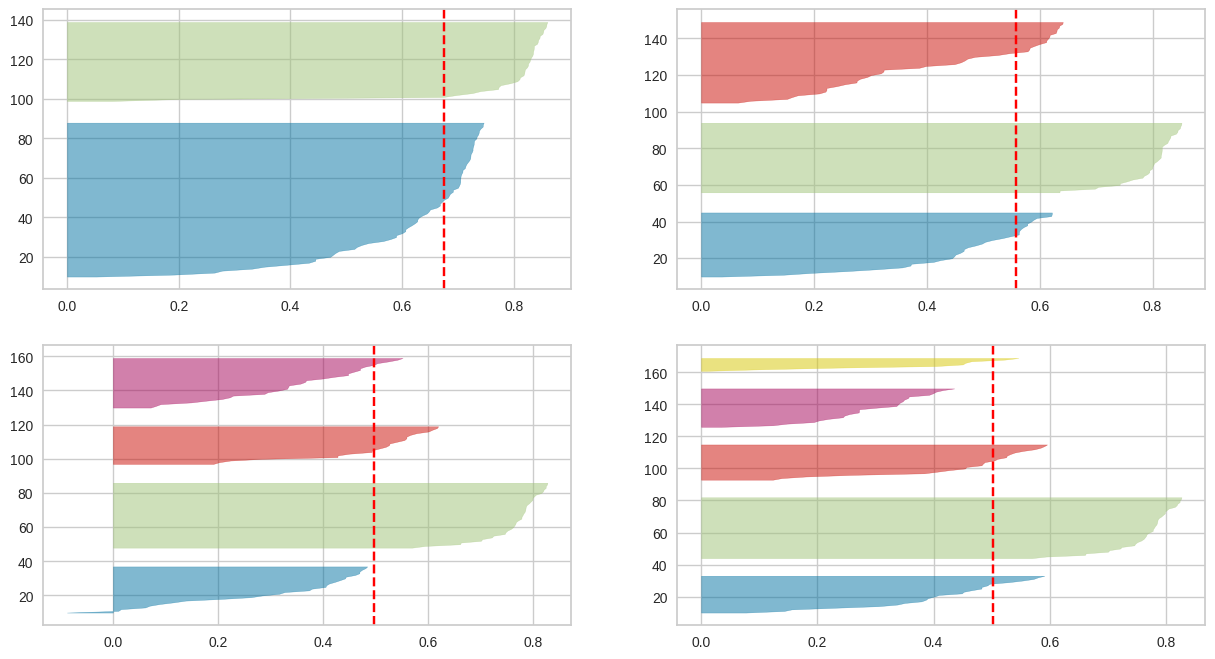

In [5]:
utils.visualize_silhouette(x_train, 5)

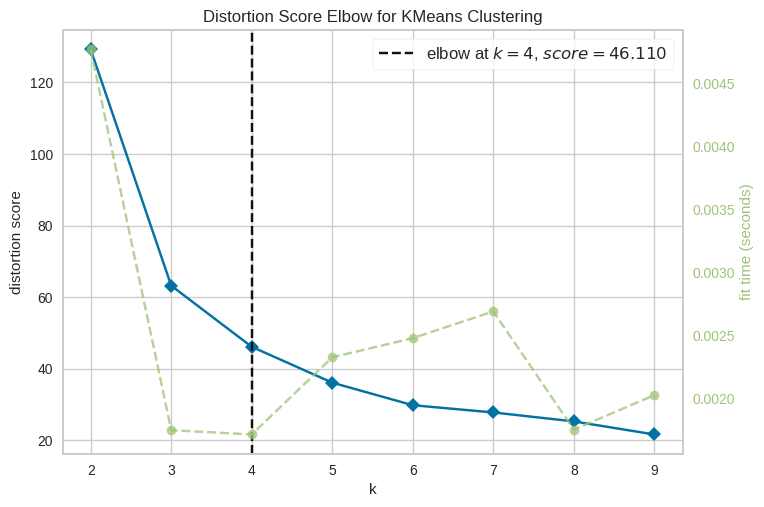

In [6]:
utils.visualize_elbow(x_train)

### Criação de Features

In [8]:
x_train_mod, x_test_mod = utils.criar_features_dataset(x_train, x_test, 3)

[6.87777778 3.08888889 5.69444444 2.06666667]
[5.02051282 3.4025641  1.46153846 0.24102564]
[5.82888889 2.72222222 4.35333333 1.42222222]
[6.87777778 3.08888889 5.69444444 2.06666667]
[5.02051282 3.4025641  1.46153846 0.24102564]
[5.82888889 2.72222222 4.35333333 1.42222222]


/home/jovyan/work/pb/tp4/utils.py:58: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_mod[column_name][index] = distance
/home/jovyan/work/pb/tp4/utils.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [9]:
x_train_mod

,0,1,2,3,F0,F1,F2
0,6.4,3.1,5.5,1.8,0.580788,4.553471,1.387964
1,5.4,3.0,4.5,1.5,1.984827,3.335166,0.537277
2,5.2,3.5,1.5,0.2,4.905279,0.211830,3.261254
3,6.1,3.0,4.9,1.8,1.146775,3.947248,0.769560
4,6.4,2.8,5.6,2.2,0.581744,4.819804,1.578396
...,...,...,...,...,...,...,...
115,4.9,3.1,1.5,0.1,5.037149,0.356982,3.300808
116,6.3,2.9,5.6,1.8,0.670475,4.631082,1.396583
117,5.8,2.7,4.1,1.0,2.234473,2.939170,0.493739
118,7.7,3.8,6.7,2.2,1.486825,6.214231,3.282445


In [11]:
x_test_mod

,0,1,2,3,F0,F1,F2
0,5.8,2.8,5.1,2.4,1.307493,4.343991,1.233063
1,6.0,2.2,4.0,1.0,2.359987,3.070079,0.777889
2,5.5,4.2,1.4,0.2,5.005950,0.933425,3.536665
3,7.3,2.9,6.3,1.8,0.807316,5.593724,2.475480
4,5.0,3.4,1.5,0.2,4.969975,0.059914,3.283562
5,6.3,3.3,6.0,2.5,0.812119,5.229551,2.104493
6,5.0,3.5,1.3,0.3,5.111489,0.198714,3.445899
7,6.7,3.1,4.7,1.5,1.158343,3.871030,1.013794
8,6.8,2.8,4.8,1.4,1.154981,4.002275,1.071966
9,6.1,2.8,4.0,1.3,2.036496,3.015558,0.468330


### Modelo de ML

#### Dataset Original

#### Dataset Modificado

### Avaliação de Modelos

### Análise Comparativa